# IN2110 obligatorisk innlevering 1b

Oppgaven har to deler, logistisk regresjon for å klassifisere språk basert på IPA lydskrift, og Named Entity Recognition med HMM. Det er en god idé å lese gjennom hele oppgavesettet før du setter i gang. 

Dersom du har spørsmål så kan du:

* gå på gruppetime,
* spørre på Discourse
* eller sende epost til in2110-hjelp@ifi.uio.no dersom alternativene over av en eller annen grunn ikke passer for spørsmålet ditt.

### Oppsett
Når du har klonet dette github-repoet som denne notebooken ligger i, har du tilgang til datene og hjelpefilene som ligger i denne mappa. Hvis du ønsker å kopiere denne mappa, "1b", over til et annet sted, så skulle det gå bra. Bare pass på at du følger med på om det er oppdateringer her i repoet som gir ut obligen. Når du har aktivert in2110-miljøet med conda, så har du tilgang til pakkene som trengs for å kjøre denne notebooken. Vi har forberedt en notebook med all prekoden, der du også kan fylle ut din kode og kjøre prosessene.

### Innlevering

Innleveringen skal helst bestå av denne Jupyter notebook fylt ut med både kode og tilhørende forklaringer. Vi understreker at innlevering av koden alene __ikke er nok__ for å bestå oppgaven -- vi forventer at notebooken også skal inneholde _beskrivelser_ (på norsk eller engelsk) av hva dere har gjort og _begrunnelser_ for valgene dere har tatt underveis. Bruk helst hele setninger, og matematiske formler om nødvendig. Evalueringstallene bør presenteres i tabeller. Det å  forklare med egne ord (samt begreper vi har gått gjennom på forelesningene) hva dere har implementert og reflektere over hvorvidt løsningen dere har lagt  besvarer oppgaven er en viktig del av læringsprosessen -- ta det på alvor! 

# Del 1: Logistisk regresjon


I den første delen av innleveringen skal vi bruke logistisk regresjon til å utvikle en enkel _språkidentifikator_, dvs. et lite system som skal predikere hvilket språk et ord hører til. Mer spesifikk skal systemet ta ordets _fonetiske transkripsjon_ som input og returnere _navnet på språket_ som ordet mest sannsynlig tilhører.  Systemet skal for eksempel kunne ta transkripsjonen [bʊndɛsvɛɾfaszʊŋ] som input og returnere ``tysk''. 

## Data

For å trene modellen (dvs. finne ut verdier for vektene og skjæringspunktene basert på data) skal vi ta i bruk eksisterende lister over ord med deres fonetiske transkripsjon i såkalt _IPA_-format (IPA står for _[International Phonetic Alphabet](https://upload.wikimedia.org/wikipedia/commons/8/8e/IPA_chart_2018.pdf)_).  Dere trenger ikke å kunne lese eller skrive slike fonetiske transkripsjoner i denne oppgaven. Det viktigste er å forstå at disse transkripsjonene beskriver språklydene som utgjør ordet, samt andre egenskaper slik som lengde, tone, trykk og intonasjon. Fonetiske transkripsjoner forteller oss hvordan et ord bør uttales.

In [61]:
import numpy as np
import pandas as pd
import oblig1b_utils
train_data, test_data = oblig1b_utils.extract_wordlist()

Reading cached file from ./langid_data.csv
Treningsett: 689238 eksempler, testsett: 76583 eksempler


Data vi skal bruke er lagt i to `DataFrame` tabeller: et treningsett med 90 % av ordene og et testsett med de resterende 10 %. Ordene fra de forskjellige språkene er blandet i disse to tabellene. `DataFrame` er en datastruktur fra Python-biblioteket [`pandas`](https://pandas.pydata.org) og representerer en slags tabell med kolonner og rader. Biblioteket `pandas` gjør det lett å visualisere og manipulere slike tabeller:

In [62]:
print("Statistikk over språkene i treningsett:")
print(train_data.språk.value_counts())
print("Første 30 ord:")
print(train_data[:60])

Statistikk over språkene i treningsett:
språk
spansk          45116
tysk            45108
finsk           45093
rumensk         45051
vietnamesisk    45046
engelsk         45032
islandsk        45007
koreansk        45002
fransk          44995
japansk         44980
arabisk         44945
kantonesisk     44850
swahilisk       43287
mandarin        40291
malayisk        25372
svensk          19089
norsk            9141
farsi            7226
khmer            2940
patwa            1667
Name: count, dtype: int64
Første 30 ord:
                        ord                    IPA         språk
431045                   권세              kwʌ̹nsʰe̞      koreansk
574424             ahondase                aondase        spansk
613302                  사적비         sʰa̠d͡ʑʌ̹k̚p͈i      koreansk
137746                混じり合う              madʑiɾiaɯ       japansk
260793              menguji                məŋudʒi      malayisk
210089           liquéfiait                likefjɛ        fransk
667511            

## Klassen

Her er skjelettet for `LanguageIdentifier`-klassen  som skal implementeres:

In [63]:
import sklearn.linear_model
class LanguageIdentifier:
    """Logistisk regresjonsmodell som tar IPA transkripsjoner av ord som input, 
    og predikerer hvilke språk disse ordene hører til."""
    
    def __init__(self):
        """Initialiser modellen"""      
        # selve regresjonsmodellen (som brukes all CPU-er på maskinen for trening)
        self._model = sklearn.linear_model.LogisticRegression(solver="liblinear", multi_class='ovr')

        """Jeg har valgt å lagre informasjon om unike symboler, utfallet av siste prediksjon og konverteringsordboka språknavn -> int 
        som egne instansvariabler"""
        self._symbols = []
        self._predictions = []
        self._class_label_dict = {}
    
    def train(self, transcriptions, languages):
        """Gitt en rekke med IPA transkripsjoner og en rekke med språknavn, tren
        den logistiske regresjonsmodellen. De to rekkene må ha samme lendge"""
        
        raise NotImplementedError()
    
    def predict(self, transcriptions):
        """Gitt en rekke med IPA transkripsjoner, finn ut det mest sansynnlige språket
        for hver transkripsjon. Rekken som returneres må ha samme lengde som rekken i input"""

        self.model.predict(transcriptions)
        
        raise NotImplementedError()
        
    def _extract_unique_symbols(self, transcriptions, min_nb_occurrences=10):
        """Gitt en rekke med IPA fonetiske transkripsjoner, ektraher en liste med alle IPA 
        symboler som finnes i transkripsjonene og forekommer minst min_nb_occurrences."""
        raise NotImplementedError()
        
    def _extract_feats(self, transcriptions):
        """Gitt en rekke med IPA transkripsjoner, ekstraher en matrise av størrelse |T|x|F|,
        hvor |T| er antall transkripsjoner, og |F| er antall features brukt i modellen."""
        
        raise NotImplementedError()

    def evaluate(self, transcriptions, languages):  
        """Gitt en rekke med IPA transkripsjoner og en rekke med språknavn, evaluer hvor godt
        modellen fungerer ved å beregne:
        1) accuracy
        2) precision, recall og F1 for hvert språk
        3) micro- og macro-averaged F1.
        """
        
        # See API fra sklearn.metrics for å finne ut hvordan dette kan gjøres! 
        raise NotImplementedError()

## Trening 
Vi skal benytte oss av en logistisk regresjonsmodell, mer spesifikk klassen [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) fra `scikit-learn`. Men for å kunne bruke modellen må vi naturligvis først estimere parametrene basert på treningsdata. 
 Hva slags trekk (_features_) skal vi bruke i modellen vår? I denne oppgaven skal vi gjøre det enkelt for oss selv, og kun ta i betrakning forekomst av bestemte IPA-symboler som identifiserer ordlyder i den fonetiske transkripsjonen av ordet. _NB_: hvis du kan litt fonetikk fra før vil dere kanskje stusse på denne overforenklingen, da IPA-symboler brukes til å kode en god del andre egenskaper knyttet til talelyder slik som lengde, tone, trykk og intonasjon. Men i denne oppgaven skal vi gå den enkle veien og bruke alle symbolene i disse transkripsjonene uten å skille mellom ulike typer.

Trekkene vil ha binære verdier (1 hvis transkripsjonen inneholder symbolet og 0 ellers) og kan sees som en slags ``bag-of-sounds'', siden de vil fortelle oss hvilke ordlyder som forekommer i ordet, men ikke i hvilken rekkefølge.

__Opgave 1.1:__ Det første skrittet er å lage en liste over alle IPA-symboler som finnes i treningsettet. Metoden `_extract_unique_symbols` skal ta de fonetiske transkripsjonene fra treningssettet som input, og returnere en liste med alle fonetiske symboler (altså tegn) som finnes i disse transkripsjonene og forekommer minst 10 ganger. Implementer denne metoden. Antall symboler kan variere litt avhengig av den tilfeldige inndelingen mellom treningsettet og testsettet, men bør ligge på rundt 155 unike symboler.

In [64]:
def _extract_unique_symbols(self, transcriptions, min_nb_occurrences=10):
    """Gitt en rekke med IPA fonetiske transkripsjoner, ektraher en liste med alle IPA 
    symboler som finnes i transkripsjonene og forekommer minst min_nb_occurrences."""

    min_occurrences = min_nb_occurrences
    occurrence_table = {}
    symbol_list = []

    for transcription in transcriptions:
        for character in transcription:
            if character in occurrence_table:
                occurrence_table[character] += 1
            else:
                occurrence_table[character] = 1

    for key in occurrence_table:
        if occurrence_table[key] >= 10:
            symbol_list.append(key)

    self._symbols = symbol_list

# her kobler vi metoden vi har implementert til klassen
LanguageIdentifier._extract_unique_symbols = _extract_unique_symbols


__Oppgave 1.2__: Deretter må vi implementere metoden `_extract_feats` som tar en liste fonetiske transkripsjoner og returnerer en matrise $X$ hvor hver rad tilsvarer en transkripsjon og hver kolonne representerer et bestemt trekk. La oss si vi har $m$ unike fonetiske symboler (ekstrahert med metoden ovenfor), og får en liste med $n$ fonetiske transkripsjoner $T = \{t_i \text{ hvor } 0 < i < n\}$. Metoden `_extract_feats(transcriptions)` må returnere en matrise $X$ av dimensjon $(n,m)$, hvor hver matrisecelle $X_{ij}$ er definert slik: 

$$
X_{ij}  =  \begin{cases} 1 \text{  hvis symbolet } j \text{ forekommer i transkripsjonen } t_i \\
0 \text{  ellers} \end{cases} 
$$

Tips: den enkleste fremgangsmåten kan være å starte med å lage en tom matrise slik som `X = np.zeros(n,m)` og deretter endre cellene hvor `X[i,j]` skal ha 1 som verdi i stedet for 0. 

In [65]:
def _extract_feats(self, transcriptions):
    """Gitt en rekke med IPA transkripsjoner, ekstraher en matrise av størrelse |T|x|F|,
    hvor |T| er antall transkripsjoner, og |F| er antall features brukt i modellen."""

    m = len(self._symbols)
    n = len(transcriptions)
    
    X = np.zeros((n, m))

    for i in range(len(transcriptions)):
        for j in range(len(self._symbols)):
            if self._symbols[j] in transcriptions[i]:
                X[i][j] = 1

    return X

LanguageIdentifier._extract_feats = _extract_feats

__Oppgave 1.3__: Vi er nå klare til for å implementere funksjonen `train`. Metoden tar to lister som input, en liste fonetiske transkripsjoner og en liste med språknavn (de to listene må ha samme lengde). Metoden skal trene den logistiske regresjonsmodellen `self.model` ved å kalle `fit(X, y)`, hvor `X` er en matrise med alle trekk ekstrahert med metoden `_extract_feats`, og `y` er outputklassene. 

Merk at `scikit-learn` krever at outputklassene `y` må være en liste med heltall (og ikke strenger). Det betyr at dere må lage en mapping mellom språknavn og heltall (f.eks. ved å si at "norsk" er 0, "arabisk" er 1, "finsk" er 2, osv.). Når dere har både matrisen `X` og output `y` er det bare å kalle metoden `fit(X, y)` for å trene modellen. Trening kan ta noen minutter avhengig av maskinen deres.

In [66]:
def train(self, transcriptions, languages):
    """Gitt en rekke med IPA transkripsjoner og en rekke med språknavn, tren
    den logistisk regresjonsmodellen. De to rekkene må ha samme lendgen"""

    self._extract_unique_symbols(transcriptions, 10)
    X_train = self._extract_feats(transcriptions)
    
    if len(transcriptions) != len(languages):
        raise IndexError("Listene 'transcriptions' og 'languages' må være av samme lengde")
    
    self._class_label_dict = {}
    
    i = 0                    
    for language in languages:
        if language not in self._class_label_dict:
            self._class_label_dict[language] = i
            i += 1
    print("Språkordbok ferdig")

    int_class_labels = [self._class_label_dict[language] for language in languages]
    
    print("Talletiketter ferdig")
            
    self._model.fit(X_train, int_class_labels)

    print("Ferdig")

LanguageIdentifier.train = train

Vi er nå klare til å trene modellen (kan ta noen minutter):

In [67]:
model = LanguageIdentifier()
transcriptions = train_data.IPA.values
languages = train_data.språk.values
model.train(transcriptions, languages)

Språkordbok ferdig
Talletiketter ferdig
Ferdig



## Prediksjon og evaluering

Når modellen er trent kan vi anvende den på nye fonetiske transkripsjoner. 

__Oppgave 1.4__: Implementer metoden `predict`. Metoden tar som input en liste fonetiske transkripsjoner og predikerer det mest sannsynlige språket for hver transkripsjon. Listen som returneres må ha samme lengde som inputlisten. Husk at `scikit-learn` opererer med outputklasser representert som heltall, så dere må forvandle disse tallene tilbake til språknavnene.  

In [68]:
def predict(self, transcriptions):
    """Gitt en rekke med IPA transkripsjoner, finn ut det mest sansynnlige språket
    for hver transkripsjon. Rekken som returneres må ha samme lengde som rekken i input"""

    X_test = self._extract_feats(transcriptions)
    
    int_predictions = self._model.predict(X_test)
    predictions = []

    for i in int_predictions:
        for language in self._class_label_dict:
            if i == self._class_label_dict[language]:
                predictions.append(language)

    return predictions

LanguageIdentifier.predict = predict

Deretter kan dere se hvordan modellen fungerer i praksis:

In [69]:
# Vi kan nå teste modellen på nye data
predicted_langs = model.predict(["konstituˈθjon", "ɡrʉnlɔʋ", "stjourtnar̥skrauːɪn", "perusˌtuslɑki"])
print("Mest sansynnlige språk for ordene:", predicted_langs)

Mest sansynnlige språk for ordene: ['spansk', 'rumensk', 'islandsk', 'finsk']


(Svarene bør være spansk, norsk, islandsk og finsk).

__Oppgave 1.5__: Til slutt kan vi gjennomføre en grundigere evaluering av modellen basert på testsettet. Implementer metoden `evaluate`. Metoden skal beregne og skrive ut de følgende evalueringsmålene:
* accuracy (den bør ligge rund 93 % hvis dere har gjort alt riktig.)
* precision, recall og $F_1$ for hvert språk
* micro- og macro-averaged F1.    
    
For å beregne disse stallene kan dere bruke metodene fra [`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support

def evaluate(self, transcriptions, languages):  
    """Gitt en rekke med IPA transkripsjoner og en rekke med språknavn, evaluer hvor godt
    modellen fungerer ved å beregne:
    1) accuracy
    2) precision, recall og F1 for hvert språk
    3) micro- og macro-averaged F1.
    """

    self._misclassifications = []
    
    # 1)
    predictions = self.predict(transcriptions)
    accuracy = accuracy_score(languages, predictions)
    print(f'Nøyaktighet: {accuracy:.4f}\n')

    # 2)
    # Her spurte jeg ChatGPT, bare så dere veit det. Den ga meg i gjengjeld en veldig grei metode:

    """
    prfs = precision_recall_fscore_support(languages, predictions)
    for i in range(len(languages)):
        string = f'{languages[i]} - Presisjon: {prfs[0][i]}, Tilbakekall: {prfs[1][i]}, F1: {prfs[2][i]}, % av y_true: {prfs[3][i] / len(predictions) * 100:.1f}'
        print(string)
    """

    precision, recall, f1, amount = precision_recall_fscore_support(languages, predictions)
    for language, precision, recall, f1, amount in zip(sorted(set(languages)), precision, recall, f1, amount):
        print(f'Språk: {language} - presisjon: {precision:.3f}, tilbakekall: {recall:.3f}, F1: {f1:.3f}, % av y_true: {amount / len(languages) * 100:.2f}')
    
    # 3)
    micro_f1 = f1_score(languages, predictions, average='micro')
    macro_f1 = f1_score(languages, predictions, average='macro')
    print(f'\nMakro-averaged F1: {macro_f1}\nMikro-averaged F1: {micro_f1}')

    # Legger til en liten statistikk over misklassifikasjoner også, for gøy
    misclassifications =  []

    for i in range(len(predictions)):
        if predictions[i] != languages[i]:
            misclassifications.append({"Transkripsjon": transcriptions[i], "Predikert språk": predictions[i], "Egentlig språk": languages[i]})

    self._misclassifications = misclassifications
    

LanguageIdentifier.evaluate = evaluate
 
# Vi kan nå evaluere hvor godt modellen fungerer på testsett
model.evaluate(test_data.IPA.values, test_data.språk.values)

Nøyaktighet: 0.9384

Språk: arabisk - presisjon: 0.964, tilbakekall: 0.948, F1: 0.956, % av y_true: 6.60
Språk: engelsk - presisjon: 0.960, tilbakekall: 0.984, F1: 0.972, % av y_true: 6.48
Språk: farsi - presisjon: 0.940, tilbakekall: 0.949, F1: 0.945, % av y_true: 1.13
Språk: finsk - presisjon: 0.992, tilbakekall: 0.995, F1: 0.994, % av y_true: 6.41
Språk: fransk - presisjon: 0.962, tilbakekall: 0.919, F1: 0.940, % av y_true: 6.54
Språk: islandsk - presisjon: 0.959, tilbakekall: 0.939, F1: 0.949, % av y_true: 6.52
Språk: japansk - presisjon: 0.983, tilbakekall: 0.951, F1: 0.967, % av y_true: 6.55
Språk: kantonesisk - presisjon: 0.995, tilbakekall: 0.973, F1: 0.984, % av y_true: 6.72
Språk: khmer - presisjon: 0.906, tilbakekall: 0.642, F1: 0.751, % av y_true: 0.45
Språk: koreansk - presisjon: 0.999, tilbakekall: 0.994, F1: 0.997, % av y_true: 6.53
Språk: malayisk - presisjon: 0.760, tilbakekall: 0.754, F1: 0.757, % av y_true: 3.71
Språk: mandarin - presisjon: 0.952, tilbakekall: 0.974,

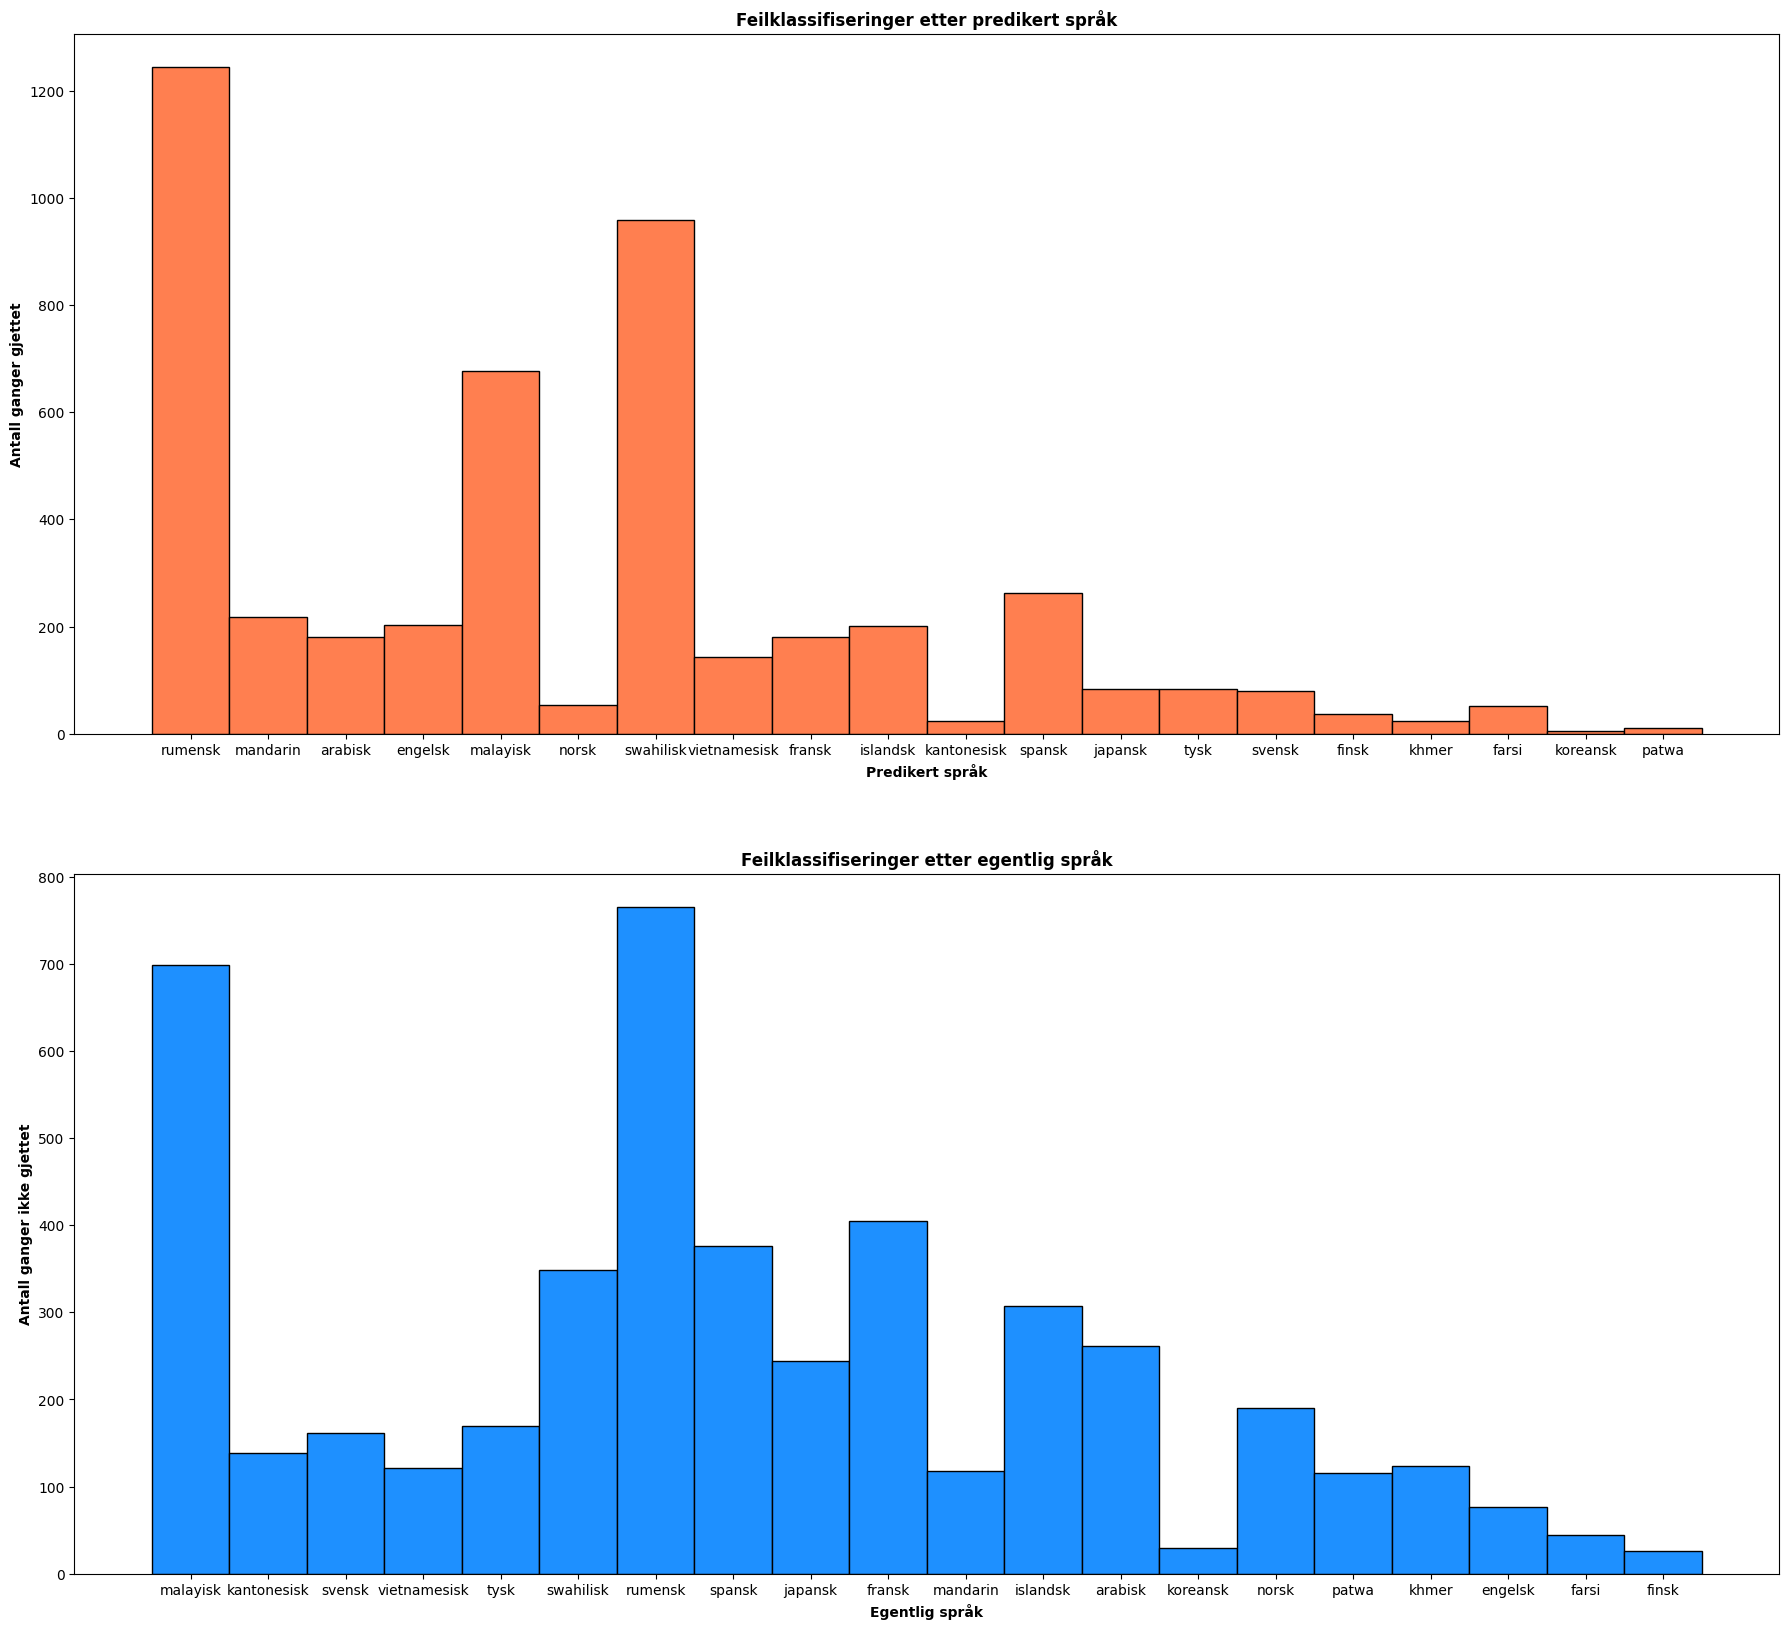

In [71]:
import matplotlib.pyplot as plt

def get_misclassifications(self):

    return self._misclassifications

LanguageIdentifier.get_misclassifications = get_misclassifications

hard_languages = [dict["Egentlig språk"] for dict in model.get_misclassifications()]
misguessed_languages = [dict["Predikert språk"] for dict in model.get_misclassifications()]

fig, ax = plt.subplots(2, 1, figsize=(22, 20))

hist, edges, _ = ax[0].hist(misguessed_languages, bins=len(set(misguessed_languages)), edgecolor='black', color='coral', align='mid')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
ax[0].set_xticks(bin_centers)
ax[0].set_xlabel('Predikert språk', fontweight='bold')
ax[0].set_ylabel('Antall ganger gjettet', fontweight='bold')
ax[0].set_title('Feilklassifiseringer etter predikert språk', fontweight='bold')

hist, edges, _ = ax[1].hist(hard_languages, bins=len(set(hard_languages)), edgecolor='black', color='dodgerblue', align='mid')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
ax[1].set_xticks(bin_centers)
ax[1].set_xlabel('Egentlig språk', fontweight='bold')
ax[1].set_ylabel('Antall ganger ikke gjettet', fontweight='bold')
ax[1].set_title('Feilklassifiseringer etter egentlig språk', fontweight='bold')
plt.show()

## Analyse av modellen

Hva har modellen egentlig lært? En stor fordel med logistisk regresjon er at modellene er relativt enkle å tolke: Hvis en vekt $w_i$ i modellen har stor positiv verdi betyr det at sannsynnlighet for outputklassen _øker_ sammen med trekket $x_i$.  Likeledes betyr en negativ verdi at sannsynlighet for outputklassen _reduseres_ med større verdier av $x_i$. Og jo større vektet er (positiv eller negativ), jo større er effekten. 

Vi kan inspisere modellen vår for å finne ut hvilke språklyder som har størst effekt på prediksjonene. I `scikit-learn` er modellvektene lagret i variabelen `coef_` (merk underscoren ved slutten). Siden modellen vår er multiklasse (med 20 unike språk) og inneholder $m \approx 155$ trekk er vektene i `coef_` en matrise av dimensjon $(20,m)$. 

__Oppgave 1.6a__: Finn ut hvilket fonetisk symbol som bidrar mest til å øke sannsynnligheten for at et ord er klassifisert som norsk. Sjekk om det gir mening ved å telle hvor ofte symbolet forekommer i et norsk ord vs. ikke-norsk ord.

__Svar__: Etter å ha laget en ordbok og en printet oversikt, ser det ut til at ingen av de andre transkripsjonene enn de norske i treningssettet inneholder det fonetiske symbolet 'ʋ' (stemt 'v'). Dette forekommer mellom 160 og 180 ganger, kun i norske transkripsjoner. Dette overrasket meg - jeg har aldri tenkt på stemt 'v' som en særnorsk lyd. Men kanskje dette også har noe å gjøre med spørsmålet jeg stiller i.f.m. neste oppgave:

__Oppgave 1.6b__: Finn ut hvilket fonetisk symbol som bidrar mest til å redusere sannsynnligheten for at et ord er klassifisert som norsk.

__Svar__: Dette symbolet er ², som angir 'tonem 2' (loven = tonem 1, låven = tonem 2) og som merkelig nok forekommer utelukkende i de svenske transkripsjonene i datasettet (ca. 1100 < x < 1300 ganger). Dette er oppsiktsvekkende, siden denne typen tonemskille er sentralt nettopp i norsk også (jf. eksempelet). Har det noe med samplingen til datasettet å gjøre? 

In [72]:
# Oppgave 1.6a:
def get_weights(self):

    return self._model.coef_

LanguageIdentifier.get_weights = get_weights

def get_symbols(self):

    return self._symbols

LanguageIdentifier.get_symbols = get_symbols

def get_class_labels(self):

    return self._class_label_dict

LanguageIdentifier.get_class_labels = get_class_labels

weights = model.get_weights()
index_no = model.get_class_labels()["norsk"]
weights_no = weights[index_no].tolist()

weight_min = min(weights_no)
worst_feature = model.get_symbols()[weights_no.index(weight_min)]
print("Trekk som gir minst sjanse for norsk:", worst_feature)

weight_max = max(weights_no)
best_feature = model.get_symbols()[weights_no.index(weight_max)]
print("Trekk som gir størst sjanse for norsk:", best_feature)

best_feature_count = {language: 0 for language in languages}
worst_feature_count = {language: 0 for language in languages}

tr_list = test_data.IPA.tolist()
lan_list = test_data.språk.tolist()

b_transcriptions = []
w_transcriptions = []

for transcription in tr_list:
    
    if best_feature in transcription:
        b_transcriptions.append(transcription)
        language = lan_list[tr_list.index(transcription)]
        best_feature_count[language] += 1
        
    elif worst_feature in transcription:
        w_transcriptions.append(transcription)
        language = lan_list[tr_list.index(transcription)]
        worst_feature_count[language] += 1

print(f"\nAntall forekomster av '{best_feature}' i ulike språk:" )
for key, value in best_feature_count.items():
    if value != 0:
        print(f'{key}: {value}')

print(f"\nAntall forekomster av '{worst_feature}' i ulike språk:" )
for key, value in worst_feature_count.items():
    if value != 0:
        print(f'{key}: {value}')

Trekk som gir minst sjanse for norsk: ²
Trekk som gir størst sjanse for norsk: ʋ

Antall forekomster av 'ʋ' i ulike språk:
norsk: 179

Antall forekomster av '²' i ulike språk:
svensk: 1189


# Del 2: sekvensmodellering

Vi skal nå jobbe på en viktig anvendelse av sekvensmodeller, nemlig å gjenkjenne navngitte entiteter (_Named Entity Recognition_ eller NER på engelsk). For å gjøre det så enkelt som mulig vil vi bruke en _Hidden Markov Model_ som sekvensmodell. Hvert ord skal assosieres med en bestemte klasse, og vi skal ta i bruk såkalt BIO-annotering (også kalt IOB i boken til Jurafsky og Martin) for å spesifisere hvilke som ord hører til en navngitt entitet. 

_NB_: I praksis er ikke HMM den mest hensiktsmessige sekvensmodellen for å gjenkjenne navngitte enheter. Andre modeller slik som _transformers_ vil være bedre egnet til denne oppgaven, med disse modellene er betydelige mer kompliserte å trene. 


### Data 
Vi skal trene modellen med dataene i `norne_train.txt`. Filen inneholder tokeniserte setninger (en per linje) hvor de navngitte entitetene er markert med XML-tags, som f.eks:

```xml
De første 43 minuttene hadde <ORG>Rosenborg</ORG> all makt og 
tilnærmet full kontroll på <LOC>Fredrikstad Stadion</LOC> .
```
I eksempelet over har vi 2 navngitte enheter, _Rosenborg_ (en organisasjon) og _Fredrikstad Stadion_ (et sted).

Vi har allerede implementert en funksjon `preprocess` som tar en tekst som input (som f.eks. setningene i trening- eller testsett) og ekstraherer lister over setninger og navngitte entiteter i disse setningene:

In [73]:
import oblig1b_utils
oblig1b_utils.preprocess("De første 43 minuttene hadde <ORG>Rosenborg</ORG> all makt og " +
                         "tilnærmet full kontroll på <LOC>Fredrikstad Stadion</LOC> .")

([['De',
   'første',
   '43',
   'minuttene',
   'hadde',
   'Rosenborg',
   'all',
   'makt',
   'og',
   'tilnærmet',
   'full',
   'kontroll',
   'på',
   'Fredrikstad',
   'Stadion',
   '.']],
 [[(5, 6, 'ORG'), (13, 15, 'LOC')]])

De navngitte entitetene er spesifisert som tupler $(i, j, tag)$ hvor $i$ er indeksen for starten av entiteten, $j$ er indeksen for slutten, og $tag$ er entitetstypen, som f.eks. ORG eller LOC. Indekstallene er på ordnivå:

### Klassen

Her er skjelettet for `NamedEntityRecogniser`-klassen  som skal implementeres:

In [74]:
import oblig1b_utils

class NamedEntityRecogniser:
    """Gjenkjenning av navngitte enheter ved bruk av HMM"""
    
    def __init__(self):
        """Intialiserer alle variablene som er nødvendig for å representere og 
        estimere  sekvensmodellen (en Hidden Markov Model) som brukes til å 
        gjenkjenne de navngitte enhetene"""

        # hvor mange ganger en label (f.eks. B-ORG) forekommer i treningsettet
        self._label_counts = {}

        # antall ganger hvert token forekommer
        self._token_counts = {}
        
        # alle labellene som forekommer i treningsettet - jeg endra instansvariablene for unike forekomster til å bli initiert til tomme lister.
        # Av en eller annen grunn funka ikke len().
        self._labels = []

        # alle token som forekommer i treningsettet
        self._vocab = []

        # hvor mange overgang fra label_1 til label2 forekommer i treningsettet
        self._transition_counts = {}
        
        # hvor mange "utslipp" fra label til token forekommer i treningsettet
        # (Merk at vi legger et spesielt symbol for ord som aldri forekommer
        # i treningsettet, men kan forekomme i testsettet)
        self._emission_counts = {("O", "<UNK>"):1}
                
        # Sansynnlighet P(label_2 | label_1)
        self._transition_probs = {}
        
        # Sansynnlighet P(token | label)
        self._emission_probs = {}
    
    
    def fit(self, tagged_text):
        """Estimerer tallene og sansynnlighetene for HMM, basert på (tokenisert)
        tekst hvor navngitte enhetene er markert med XML tags (se norne.txt)"""
        
        # Ekstrahere setninger og navngitte enheter markert i hver setning
        sentences, all_spans = oblig1b_utils.preprocess(tagged_text)
                
        for sentence, spans in zip(sentences, all_spans):
     
            # Ekstrahere labelsekvenser, med BIO marking
            label_sequence = get_BIO_sequence(spans, len(sentence))
                                              
            # Oppdatere tallene 
            self._add_counts(sentence, label_sequence)
            
        # Beregne sansynnlighetene (transition og emission) ut fra tallene
        self._fill_probs()
                   
        
    def _add_counts(self, sentence, label_sequence):
        """Oppdaterer variablene self.vocab, self.labels, self.label_counts, 
        self.transition_counts og  self.emission_counts, basert på setningen og 
        sekvenslabellen assosiert med dem. 
        Merk at setningen og label_sequence har samme lengde."""
        
        
    def _fill_probs(self, alpha_smoothing=1E-6):
        """Beregne sannsynlihetsfordelinger self.transition_probs og
        self.emission_probs basert på tallene som er samlet inn i 
        self.label_counts, self.transition_counts og self.emission_counts.
        
        Når det gjeler self.emission_probs bør vi legge Laplace smoothing, med en
        verdi for alpha som er alpha_smoothing."""
        
        raise NotImplementedError()
            
    
    def _beam_search(self, sentence):
        """Kjører beam-search på setningen (liste over tokens) og
        returnerer to outputs: 
        1) en labelsekvens (som har samme lengde som setningen)
        2) sansynnlighet for hele sekvensen """

        raise NotImplementedError()

                
    def label(self, text):
        """Gitt en tokenisert tekst, finner ut navngitte enheter og markere disse
        med XML tags. """
        sentences, _ = oblig1b_utils.preprocess(text)
        spans = []
        for sentence in sentences:
            sentence = [token if token in self._vocab else "<UNK>" for token in sentence]
            label_sequence, _ = self._beam_search(sentence)
            spans.append(oblig1b_utils.get_spans(label_sequence))
        
        return oblig1b_utils.postprocess(sentences, spans)

### BIO-markering


For å trene en HMM må hvert ord kobles til en merkelapp (_label_). En vanlig måte å gjøre dette er å bruke en såkalt BIO-markering, hvor hvert ord markeres som:
* 'O' (hvis ordet ikke tilhører en navngitt entitet)
* 'B-X' (hvis ordet er det første ordet i en navngitt entitet av type 'X')
* 'I-X' (hvis ordet tilhører en entitet av type 'X', men ikke er det første ordet)

__Oppgave 2.1__: Implementer funksjonen _get_BIO_sequence_ som tar som input en liste med ``text spans'' og setningslengden og gir tilbake en rekke (av samme lengde som setningen) med BIO-markeringer.

In [75]:
    
def get_BIO_sequence(spans, sentence_length):
    """Gitt en liste over "spans", representert som tuples (start, end, tag),
    og en setningslengde, produserer en sekvens med BIO (også kalt IOB) labeller
    for setningen. 
    Eksempel: hvis spans=[(1,3,'ORG')] og sentence_length=6 bør resultatet være
    ['O', 'B-ORG', 'I-ORG', 'O', 'O', 'O']"""
    
    # Implementer metoden her!
    if not isinstance(spans, list):
        raise TypeError(f"Parameteren 'spans' må være en liste. Fikk {type(spans)}")
        
    for i in range(len(spans)):
        assert len(spans[i]) == 3, f"Lista 'spans' må inneholde tupler av lengde 3. Fant: {spans[i]}"

    sequence = ['O' for i in range(sentence_length)]
    if len(spans) != 0:
        for info in spans:
            
            start = info[0]
            end = info[1]
            label = info[2]
    
            sequence[start] = "B-" + label
            if end > start:
                for i in range(start+1, end):
                    sequence[i] = "I-" + label
                
    return sequence
    


### Telling

Som vi så i forelesningen er Hidden Markov Models definert med en vokabular (som tilsvarer ``observasjonene''), et sett mulig merkelapp (de skjulte tilstandene), og to sannsynlighetsfordelinger:
* Den første fordelingen er kalt transisjonsmodell og definert som $P(label_t | label_{t-1})$. Transisjonsmodellen forteller oss hvor sannsynlig det er at $label_{t-1}$ (assosiert med ord $w_{t-1}$) følges av $label_t$ (assosiert med ord $w_t$). 
* Den andre fordelingen er emisjonsmodellen, definert som $P(w_t | label_t)$. Emisjonsmodellen forteller oss hvor sannsynlig det er å observere ordet $w_t$ hvis merkelappen for dette ordet er $label_t$.

For å estimere disse to sannsynlighetsfordelinger må vi telle:
* Alle ordene som forekommer i treningssettet
* Alle BIO-labels som forekommer i treningssettet
* Antall ganger hver BIO-label forekommer i treningssettet
* Antall ganger to BIO-labels følger hverandre i treningssettet
* Antall ganger et ord er observert med en BIO-label i treningssettet

__Oppgave 2.2__: Implementer metoden `_add_counts` som oppdaterer variablene som inneholder disse tallene.  

In [76]:
def _add_counts(self, tokenised_sentence, label_sequence):
    """
    Oppdaterer variablene self.vocab, self.labels, self.label_counts, 
    self.transition_counts og  self.emission_counts, basert på setningen og 
    sekvenslabellene assosiert med dem. 
    Merk at setningen og label_sequence må ha samme lengde.

    Siden metoden oblig1b_utils.preprocess(tekst_med_entitetsmarkører) returnerer setningen som en liste med tokener, kan vi bruke dette direkte
    inn i denne metoden. Jeg substituerte derfor parameternavnet 'sentence' med'tokenised sentence'.
    """
        
    # Implementer metoden her!
    if len(tokenised_sentence) != len(label_sequence):
       raise ValueError(f"Listene tokenised_sentence og label_sequence må være av samme lengde. Fikk len(tokenised_sentence) == {len(tokenised_sentence)}"
                           + f"og len(label_sequence == {len(label_sequence)})")

    if '<s>' not in self._label_counts:
        self._label_counts['<s>'] = 1
    else:
        self._label_counts['<s>'] += 1
    
    for token in tokenised_sentence:
        # Tokenet legges til i self._tokens dersom det ikke er der ennå. Slik ender vi opp med ei liste over unike token.
        if token not in self._vocab:
            self._token_counts[token] = 1
            self._vocab.append(token)
        else:
            self._token_counts[token] += 1
    
    for i in range(len(label_sequence)):
        label = label_sequence[i]
        # Teller forekomst av hver etikett og fører inn i self._label_counts. Bruker samme logikk som med self._vocab på self._labels
        if label not in self._labels:
            self._label_counts[label] = 1
            self._labels.append(label)
        else:
            self._label_counts[label] += 1

        # Henter indeksene til gjeldende etikett og forrige, så man kan bruke disse til å lage tupler til instansvariablene
        prev_index = i - 1
        prev_label = label_sequence[prev_index]

        # Legger til i emission_counts:
        emission_tuple = (label_sequence[i], tokenised_sentence[i])
        if emission_tuple not in self._emission_counts:
            self._emission_counts[emission_tuple] = 1
        else:
            self._emission_counts[emission_tuple] += 1

        # Transition counts:
        if i == 0:
            transition_tuple = ('<s>', label)
            if transition_tuple not in self._transition_counts:
                self._transition_counts[transition_tuple] = 1
            else:
                self._transition_counts[transition_tuple] += 1

        else:
            transition_tuple = (prev_label, label)
            if transition_tuple not in self._transition_counts:
                self._transition_counts[transition_tuple] = 1
            else:
                self._transition_counts[transition_tuple] += 1        
            
NamedEntityRecogniser._add_counts = _add_counts

### Sannsynligheterfordelinger

Med hjelp av disse tallene kan vi nå estimere transisjonsmodellen og emisjonsmodellen. For emisjonsmodellen bør dere legge til _Laplace smoothing_ for å gjøre modellen mer robust, da treningssettet er relativt lite. La oss si at $C(label)$ er antall ganger BIO-merkelappen $label$ ble observert, og $C(label, token)$ antall ganger ordet $token$ ble observert sammen med $label$.  Ved hjelp av Laplace smoothing definerer vi sannsynligheten $P(token | label)$ slik:

$$
P(token | label) = \frac{C(label, token) + \alpha}{C(label) + \alpha V}
$$

hvor $V$ er størrelsen på vokabularet. 

__Oppgave 2.3__: Implementer metoden `_fill_probs` som beregner transisjonsmodellen og emisjonsmodellen.  

In [77]:
def _fill_probs(self, alpha_smoothing=1E-6):
    """Beregne sannsynlihetsfordelinger self.transition_probs og
    self.emission_probs basert på tallene som er samlet inn i 
    self.label_counts, self.transition_counts og self.emission_counts.
        
    Når det gjeler self.emission_probs bør vi legge Laplace smoothing, med en
    verdi for alpha som er alpha_smoothing."""

    # Sannsynlighet P(label_2 | label_1)
    self._transition_probs = {}
    
    # Sannsynlighet P(token | label)
    self._emission_probs = {}
    # Implementer metoden her!
    for label1 in set(self._label_counts):
        
        # Først transisjonssannsynlighetene:
        for label2 in set(self._label_counts):
            if (label1, label2) not in self._transition_probs:
                try:
                    prob = self._transition_counts[(label1, label2)] / self._label_counts[label1]
                    self._transition_probs[(label1, label2)] = prob
                except KeyError: # Alle KeyErrors sørger 
                    pass
                    
        # Emisjonssannsynlighet (med 'Laplace smoothing'):
        for token in set(self._token_counts):
            if (label1, token) not in self._emission_probs:
                try:
                    prob = (self._emission_counts[(label1, token)] + alpha_smoothing) / (self._label_counts[label1] + alpha_smoothing * len(self._vocab))
                    self._emission_probs[(label1, token)] = prob
                except KeyError:
                    pass
                
NamedEntityRecogniser._fill_probs = _fill_probs            

Og vi kan nå trene modellen:

In [78]:
# Creating and training the model
with open("norne_train.txt", 'r', encoding='utf-8') as fd:
    model = NamedEntityRecogniser()
    training_texts = fd.read()
    model.fit(training_texts)


### Dekoding med beam search

Til slutt skal vi implementere metoden `_beam_search` som skal finne den mest sannsynlige label-sekvensen for en setning ved hjelp av beam-search-algoritmen. 

Vi har sett hvordan beam search fungerer i forelesningen. Kort fortalt består et _beam_ av en mengde _hypoteser_, hvor en hypotese representerer her en mulig sekvens av BIO-labeller for setningen. Vi bygger opp disse hypotesene ord etter ord, inntil alle ordene er behandlet. I beam-search begrenser vi antall hypoteser som kan lagres etter hvert steg (=_beam width_) for å unngå en kombinatorisk eksplosjon.

__Oppgave 2.4__: Implementer metoden `_beam_search`. For å gjøre det litt lettere er metoden allerede delvis implementert.

In [87]:
def _beam_search(self, sentence, beam_width=3):
    
    """Kjører beam search på setningen (liste over tokens), og
    returnerer to outputs: 
    1) en labelsekvens (som har samme lengde som setningen)
    2) sansynnlighet for hele sekvensen """

    # Vi starter med en beam som består av én tom hypotese
    # Hver hypotese i beam består av to elementer:
    # -'labels' er en liste over BIO-labels (en label per ord i setningen)
    # -'prob' er sannsynligheten for denne labelsekvensen
    beam = [{"labels":[], "prob":1.0}]
    
    for token in sentence:
        
        # Lista 'best_matches' fylles med beam_width antall hypoteser og erstatter 'beam' etter hver iterasjon
        best_matches = []
        
        for dict in beam:
            if len(dict["labels"]) == 0:
                prev_label = '<s>'
            else:
                prev_label = dict["labels"][-1]

            # Lager ei liste med tupler (etikett, sannsynlighet) og sorterer den til slutt etter sannsynligheten (lambda x: x[1])
            probs = []
            for label in self._labels:
                try:
                    prob = (label, self._transition_probs[(prev_label, label)] * dict["prob"] * self._emission_probs[(label, token)])
                    probs.append(prob)
                except KeyError:
                    prob = 0
                    probs.append((label, prob))
                    pass
            probs = sorted(probs, key=lambda x: x[1], reverse=True)

            # Denne if-testen sørger for at best_matches fylles med 3 hypoteser uansett om det er første eller n-te iterasjon
            if len(beam) == beam_width:
                new_sequence = dict["labels"]
                new_sequence.append(probs[0][0])
                best_matches.append({"labels": new_sequence, "prob": probs[0][1]})
                
            else:
                for i in range(beam_width):
                    new_sequence = [probs[i][0]]
                    best_matches.append({"labels": new_sequence, "prob": probs[i][1]})
        beam = best_matches
        
    # Vi velger hypotesen med høyest sannsynlighet
    best_hypothesis = sorted(beam, key=lambda x : x["prob"])[-1]

    # Og returnerer labelsekvensen og dens sannsynlighet
    return best_hypothesis["labels"], best_hypothesis["prob"]

NamedEntityRecogniser._beam_search = _beam_search            

In [88]:
model._beam_search(['Kjell', 'Magne', 'Bondevik', 'var', 'statsminister', 'i', 'Norge'])

(['B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'B-GPE'], 4.1146522138521545e-20)

Når dere har implementert modellen ferdig kan dere teste ut hvordan den fungerer ved å kalle metoden `label`:

In [89]:
# Applying the model to a sample sentence
model.label("Kjell Magne Bondevik var statsminister i Norge .")
# Forventet svar: '<PER>Kjell Magne Bondevik</PER> var statsminister i <GPE>Norge</GPE> .'

'<PER>Kjell Magne Bondevik</PER> var statsminister i <GPE>Norge</GPE> .'

### Valgfritt spørsmål (for de modigste)
 
Det er ofte en dårlig idé å gange mange små sannsynligheter, da vi kan havne i numerisk _underflow_. En vanlig løsning er å benytte log-sannsynligheter som kan summeres i stedet for å multipliseres, slik som forklart [her](http://www.cs.columbia.edu/~mcollins/cs4705-fall2018/notes-on-logs.pdf).

__Oppgave 2.5__: Prøv å implementere beam search algoritmen med log-sannsynligheter.  

In [92]:
import math

def _beam_search(self, sentence, beam_width=3):

    # -'prob' er sannsynligheten for denne labelsekvensen (default denne gangen er log10(1) = 0)
    beam = [{"labels":[], "prob":0.0}]
    
    for token in sentence:
        
        best_matches = []
        
        for dict in beam:
            if len(dict["labels"]) == 0:
                prev_label = '<s>'
            else:
                prev_label = dict["labels"][-1]

            probs = []
            for label in self._labels:
                try:
                    # Her er forskjell nr. 2 fra forrige ._beam_search-metode - math.log10() på begge sannsynlighetsberegningene og addisjon istedenfor multiplikasjon:
                    prob = (label, math.log10(self._transition_probs[(prev_label, label)]) + dict["prob"] + math.log10(self._emission_probs[(label, token)]))
                    probs.append(prob)
                except KeyError:
                    pass
            probs = sorted(probs, key=lambda x: x[1], reverse=True)

            if len(beam) == beam_width:
                new_sequence = dict["labels"]
                new_sequence.append(probs[0][0])
                best_matches.append({"labels": new_sequence, "prob": probs[0][1]})
                
            else:
                for i in range(beam_width):
                    index = 0
                    
                    """Må tweake litt for å deale med at log10(0) er udefinert (man får mange sannsynligheter = 0). Gjør nå at lista probs ikke 
                    utvides med prob = 0 for hver KeyError, men at sannsynligheten rett og slett bare ikke legges til i lista. Dette må igjen 
                    omgås med en try- / except-test for å unngå IndexError, fordi lista sannsynligvis vil inneholde færre enn 3 elementer: """
                    
                    try:
                        new_sequence = [probs[index][0]]
                        best_matches.append({"labels": new_sequence, "prob": probs[index][1]})
                        index += 1
                    except IndexError:
                        index = index - 1
                        new_sequence = [probs[index][0]]
                        best_matches.append({"labels": new_sequence, "prob": probs[index][1]})
                        
        beam = best_matches
        
    # Vi velger hypotesen med høyest sannsynlighet - som denne gangen bare er den høyeste 10-logaritmen:
    best_hypothesis = sorted(beam, key=lambda x : x["prob"])[-1]

    # Og returnerer labelsekvensen og dens sannsynlighet
    return best_hypothesis["labels"], best_hypothesis["prob"]

NamedEntityRecogniser._beam_search = _beam_search

In [93]:
model._beam_search(['Kjell', 'Magne', 'Bondevik', 'var', 'statsminister', 'i', 'Norge'])

(['B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'B-GPE'], -19.38566686713167)

In [94]:
# Applying the model to a sample sentence
model.label("Kjell Magne Bondevik var statsminister i Norge .")
# Forventet svar: '<PER>Kjell Magne Bondevik</PER> var statsminister i <GPE>Norge</GPE> .'

'<PER>Kjell Magne Bondevik</PER> var statsminister i <GPE>Norge</GPE> .'